In [1]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('T10Y2Y_monthly_mean.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
regressor = load_model('model_best_current_2.h5')

In [5]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [6]:
dataset_total = df.iloc[:, 1:2].values

In [7]:
timestemp = 36
prediction_month = 36

In [8]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [9]:
print(result)

[-0.395344, -0.12945236, 0.0062923487, 0.016424915, -0.114241265, -0.2550192, -0.37604317, -0.44407815, -0.48430505, -0.51042575, -0.55093163, -0.6195558, -0.7194641, -0.83747965, -0.93922883, -1.0004071, -0.9943742, -0.9458356, -0.85652345, -0.76477367, -0.68063384, -0.61673844, -0.577515, -0.54045933, -0.51739144, -0.48234954, -0.4514946, -0.41713014, -0.38844943, -0.3650563, -0.34970686, -0.35601714, -0.38410127, -0.44151548, -0.51293385, -0.59598553]


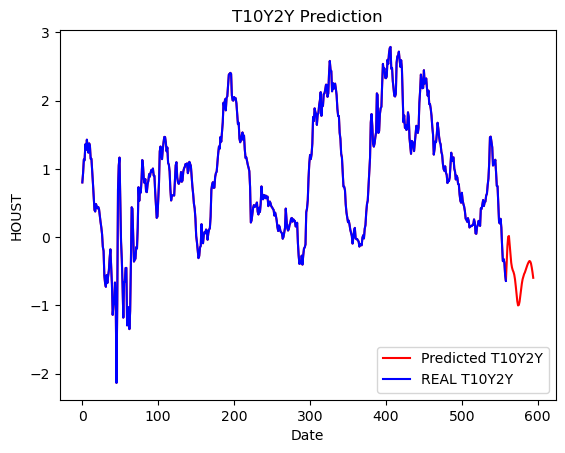

In [10]:
plt.plot(dataset_total, color = 'red', label = 'Predicted T10Y2Y')
plt.plot(training_set, color = 'blue', label = 'REAL T10Y2Y')
plt.title('T10Y2Y Prediction')
plt.xlabel('Date')
plt.ylabel('HOUST')
plt.legend()
plt.show()

In [11]:
result = pd.DataFrame({'T102Y2': result})
result.to_csv('result.csv', index=False)